In [40]:
#Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings('ignore')

print("Libraries Imported Successfully")


Libraries Imported Successfully


In [41]:
#Load Dataset

data_path = r"C:\Users\DHEERAJ\OneDrive\Desktop\dheeraj\creditcard.csv"
df = pd.read_csv(data_path)

print("Dataset Loaded")
print("Shape:", df.shape)
df.head()


Dataset Loaded
Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [42]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


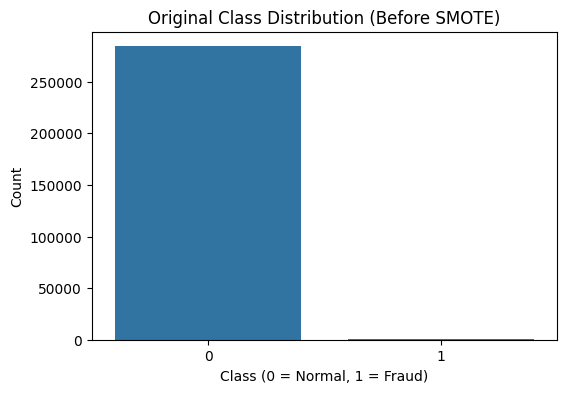

In [43]:
#Class Distribution (BEFORE SMOTE)

plt.figure(figsize=(6,4))
sns.countplot(x=df['Class'])
plt.title("Original Class Distribution (Before SMOTE)")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


In [44]:
#Scaling + SMOTE (Synthetic Data Creation)

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Train after SMOTE:", X_train_res.shape)
print("Test (original):", X_test_scaled.shape)


Train after SMOTE: (454902, 30)
Test (original): (56962, 30)


In [ ]:
# Convert SMOTE output back to DataFrame
balanced_df = pd.DataFrame(X_train_res, columns=X.columns)
balanced_df['Class'] = y_train_res


# Save to CSV
save_path = r"C:\Users\DHEERAJ\OneDrive\Desktop\dheeraj\creditcard_balanced.csv"

## This balanced dataset contains only SMOTE-augmented TRAINING data
balanced_df.to_csv(save_path, index=False)

print("Synthetic balanced dataset saved successfully at:")
print(save_path)


Synthetic balanced dataset saved successfully at:
C:\Users\DHEERAJ\OneDrive\Desktop\dheeraj\creditcard_balanced.csv


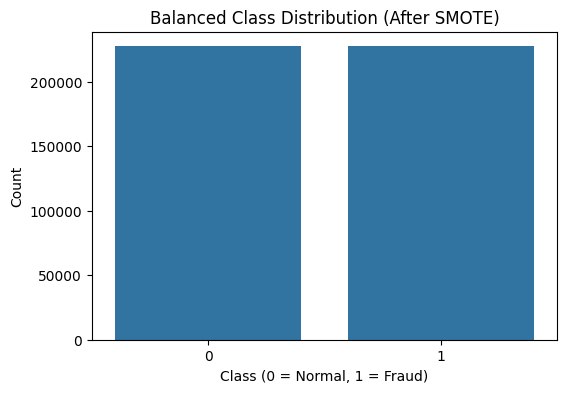

In [46]:
#Class Distribution (AFTER SMOTE)

plt.figure(figsize=(6,4))
sns.countplot(x=y_train_res)
plt.title("Balanced Class Distribution (After SMOTE)")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Count")
plt.show()


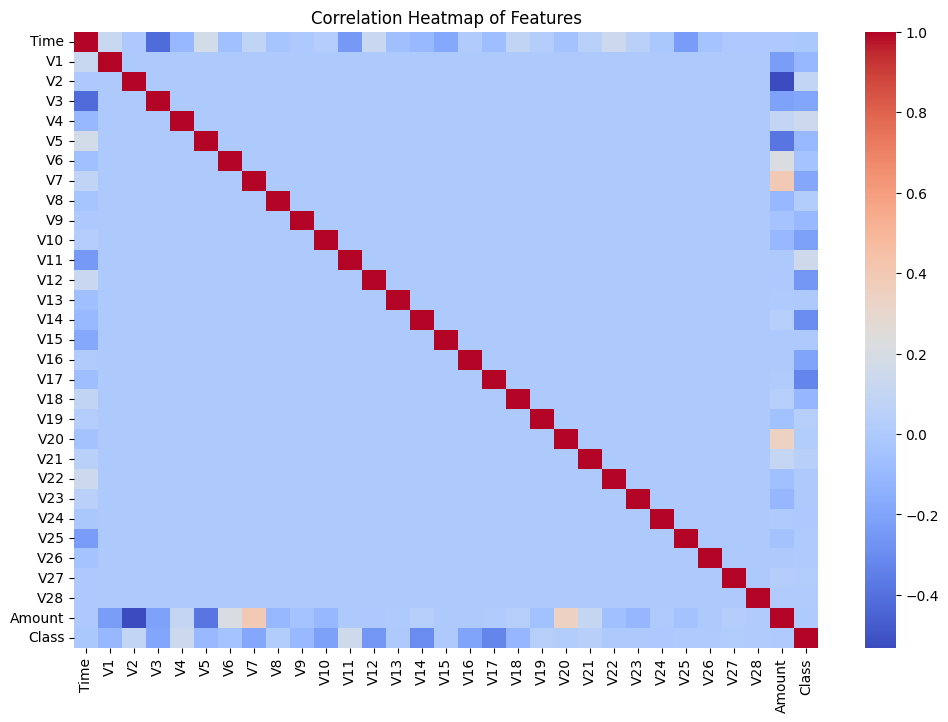

In [47]:
#Correlation Heatmap

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap of Features")
plt.show()


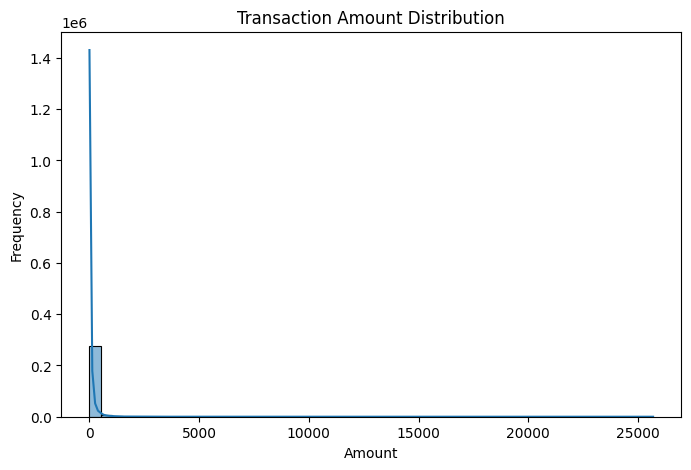

In [48]:
#Transaction Amount Distribution
 
plt.figure(figsize=(8,5))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


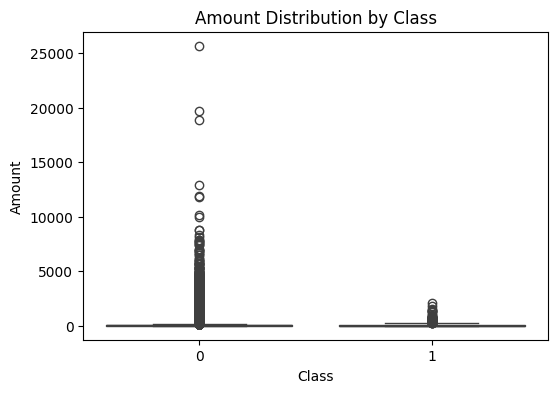

In [49]:
#Fraud vs Amount Boxplot

plt.figure(figsize=(6,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Amount Distribution by Class")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()


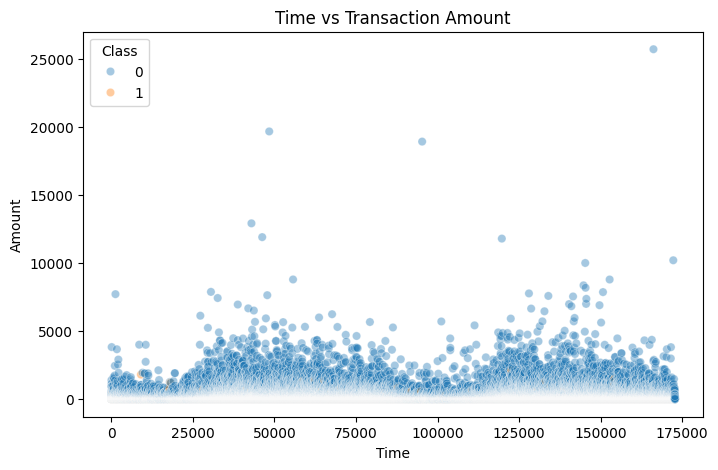

In [50]:
#Time vs Fraud Scatter

plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Time'], y=df['Amount'], hue=df['Class'], alpha=0.4)
plt.title("Time vs Transaction Amount")
plt.xlabel("Time")
plt.ylabel("Amount")
plt.show()


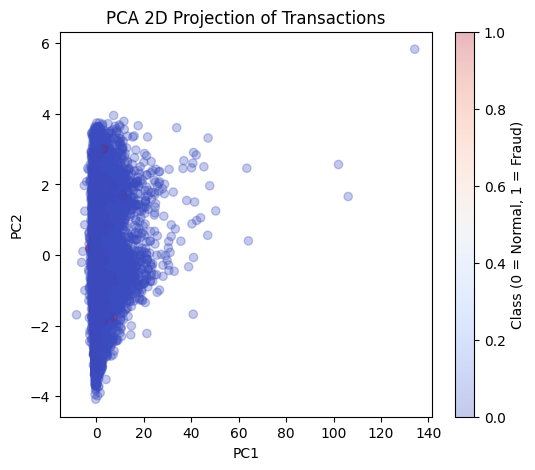

In [81]:
#PCA Visualization

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(6,5))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y_train, cmap='coolwarm', alpha=0.3)
plt.colorbar(label="Class (0 = Normal, 1 = Fraud)")
plt.title("PCA 2D Projection of Transactions")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


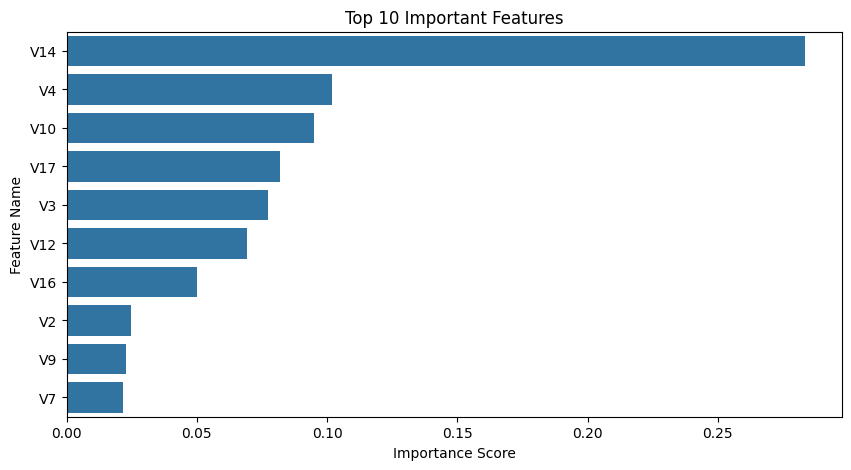

In [80]:
#Feature Importance (Random Forest)
 
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train_res, y_train_res)

importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10,5))
imp_df = pd.DataFrame({"Feature": features, "Importance": importances})
imp_df = imp_df.sort_values(by="Importance", ascending=False).head(10)
sns.barplot(x="Importance", y="Feature", data=imp_df)
plt.title("Top 10 Important Features")
plt.xlabel("Importance Score")
plt.ylabel("Feature Name")
plt.show()


In [79]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)
y_prob_lr = lr.predict_proba(X_test_scaled)[:,1]


print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.63      0.72        98

    accuracy                           1.00     56962
   macro avg       0.91      0.82      0.86     56962
weighted avg       1.00      1.00      1.00     56962



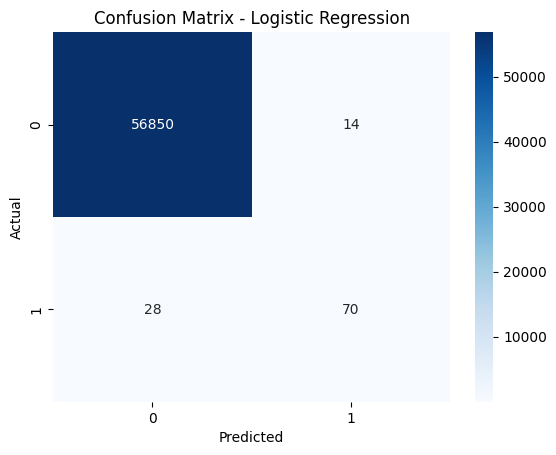

In [54]:
#Confusion Matrix

cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


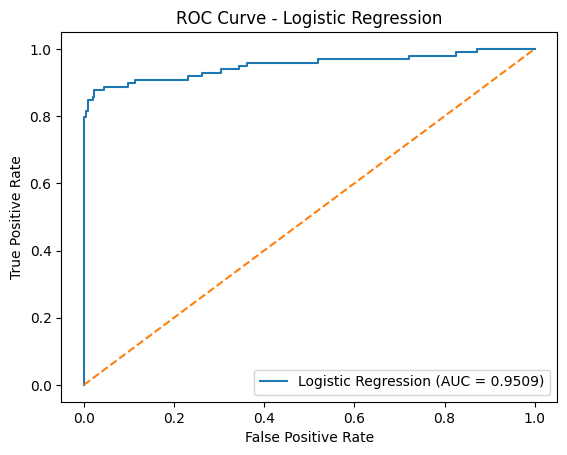

In [55]:
#ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label="Logistic Regression (AUC = %0.4f)" % roc_auc)
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()


In [56]:
# ===============================
# Random Forest Classifier
# ===============================

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize model with regularization to avoid overfitting
rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,          # controls tree depth
    min_samples_split=10, # avoids very small splits
    min_samples_leaf=5,   # smooths leaf nodes
    random_state=42,
    n_jobs=-1
)

# Train on SMOTE-balanced training set only
rf.fit(X_train_res, y_train_res)

# Predict on untouched test set
y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy*100:.2f}%\n")
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 99.89%

Random Forest Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.86      0.72        98

    accuracy                           1.00     56962
   macro avg       0.81      0.93      0.86     56962
weighted avg       1.00      1.00      1.00     56962



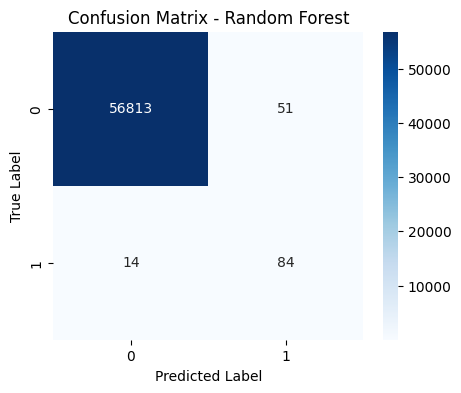

In [57]:
# ===============================
# Confusion Matrix - Random Forest
# ===============================


cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


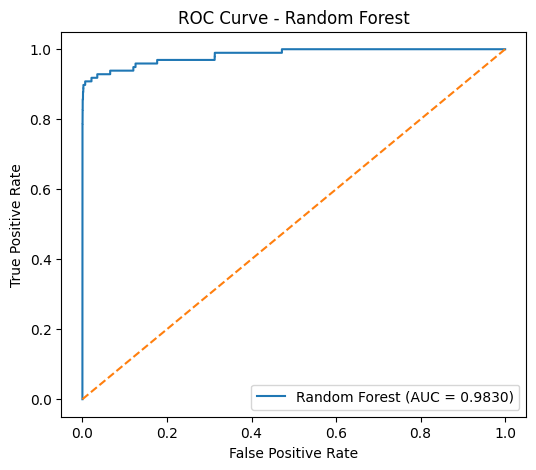

Random Forest AUC Score: 0.9830404516899612


In [58]:
# ===============================
# ROC Curve - Random Forest
# ===============================

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Random Forest (AUC = %0.4f)" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

print("Random Forest AUC Score:", roc_auc)


In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize XGBoost model (regularized, no overfitting)
xgb = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)

# Train on SMOTE-balanced training data
xgb.fit(X_train_res, y_train_res)

# Predict on original test data
y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

# Accuracy & Report
acc_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {acc_xgb*100:.2f}%\n")
print("XGBoost Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 99.92%

XGBoost Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.86      0.78        98

    accuracy                           1.00     56962
   macro avg       0.86      0.93      0.89     56962
weighted avg       1.00      1.00      1.00     56962



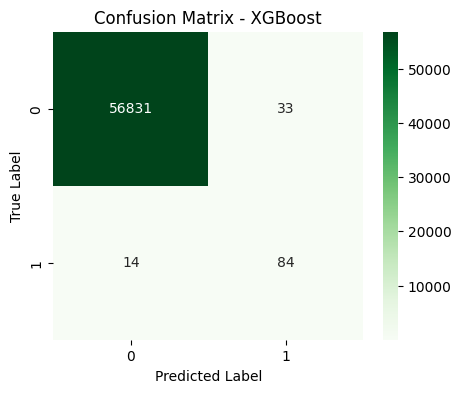

In [60]:
#Confusion Matrix – XGBoost

cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


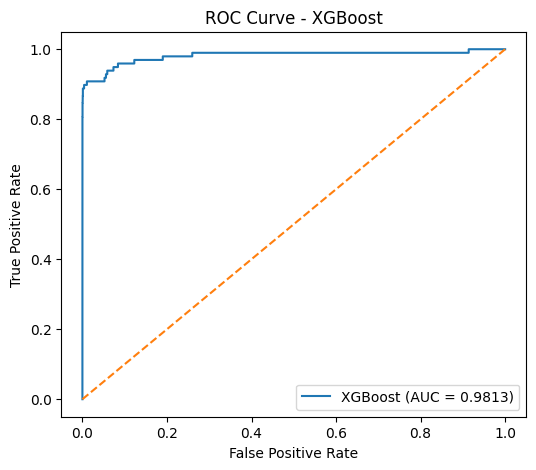

XGBoost AUC Score: 0.9813192845371125


In [61]:
#ROC Curve – XGBoost
fpr, tpr, _ = roc_curve(y_test, y_prob_xgb)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="XGBoost (AUC = %0.4f)" % roc_auc)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend(loc="lower right")
plt.show()

print("XGBoost AUC Score:", roc_auc)



In [62]:
#Build the ANN

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt

# Input dimension
input_dim = X_train_res.shape[1]

model = Sequential([
    Dense(64, activation='relu', input_dim=input_dim),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │         1,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,097 (16.00 KB)

 Trainable params: 4,097 (16.00 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
#Train the ANN

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_res, y_train_res,
    validation_split=0.2,
    epochs=20,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)




Epoch 1/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9560 - loss: 0.1145 - val_accuracy: 0.9785 - val_loss: 0.0577
Epoch 2/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9875 - loss: 0.0358 - val_accuracy: 0.9987 - val_loss: 0.0162
Epoch 3/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9947 - loss: 0.0188 - val_accuracy: 1.0000 - val_loss: 0.0069
Epoch 4/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9968 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0045
Epoch 5/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9978 - loss: 0.0092 - val_accuracy: 1.0000 - val_loss: 0.0035
Epoch 6/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9983 - loss: 0.0075 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 7/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9985 - loss: 0.0064 - val_accuracy: 0.9999 - val_loss: 0.0019
Epoch 8/20
711/711 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9988 - loss: 0.0051 - val_accuracy: 1.

In [64]:
#Accuracy & Classification Report

y_prob_ann = model.predict(X_test_scaled).ravel()
y_pred_ann = (y_prob_ann > 0.5).astype(int)

ann_acc = accuracy_score(y_test, y_pred_ann)
print(f"ANN Accuracy: {ann_acc*100:.2f}%\n")

print("ANN Classification Report:\n")
print(classification_report(y_test, y_pred_ann))



1781/1781 ━━━━━━━━━━━━━━━━━━━━ 1s 663us/step
ANN Accuracy: 99.92%

ANN Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.72      0.84      0.77        98

    accuracy                           1.00     56962
   macro avg       0.86      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



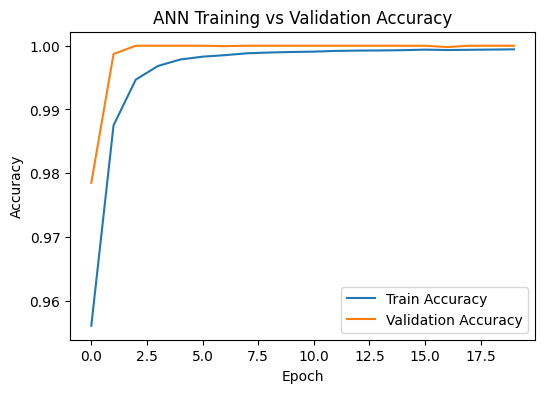

In [65]:
#Training vs Validation Accuracy Plot

plt.figure(figsize=(6,4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("ANN Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


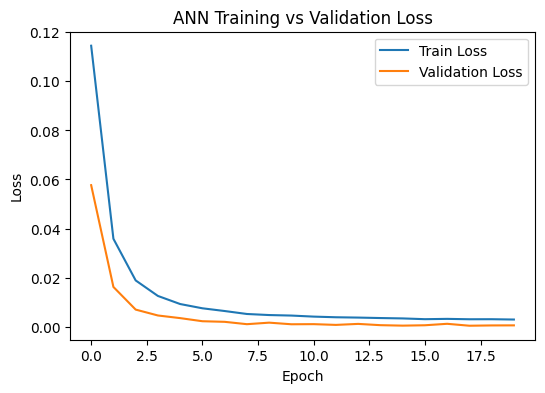

In [66]:
#Training vs Validation Loss Plot

plt.figure(figsize=(6,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("ANN Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


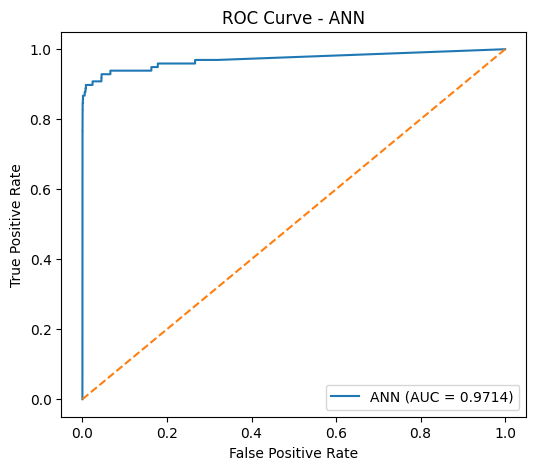

ANN AUC Score: 0.9714498718029698


In [67]:
#ROC Curve – ANN

fpr, tpr, _ = roc_curve(y_test, y_prob_ann)
roc_auc_ann = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="ANN (AUC = %0.4f)" % roc_auc_ann)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - ANN")
plt.legend(loc="lower right")
plt.show()

print("ANN AUC Score:", roc_auc_ann)



In [68]:
#Autoencoder Model
#Prepare data

# Use only normal class for training autoencoder
X_train_norm = X_train_scaled[y_train == 0]
X_test_all = X_test_scaled
y_test_all = y_test



In [70]:
#Build Autoencoder
#Autoencoder Model

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping

# Prepare data
X_train_norm = X_train_scaled[y_train == 0]
X_test_all = X_test_scaled
y_test_all = y_test

# Build Autoencoder
input_dim = X_train_norm.shape[1]
input_layer = Input(shape=(input_dim,))

encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(16, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='linear')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │           992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 30)             │           990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,054 (11.93 KB)

 Trainable params: 3,054 (11.93 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
#Train Autoencoder

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history_ae = autoencoder.fit(
    X_train_norm, X_train_norm,
    validation_split=0.2,
    epochs=20,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.6531 - val_loss: 0.4311
Epoch 2/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3589 - val_loss: 0.3063
Epoch 3/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2761 - val_loss: 0.2471
Epoch 4/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2292 - val_loss: 0.2143
Epoch 5/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.2033 - val_loss: 0.1933
Epoch 6/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1859 - val_loss: 0.1790
Epoch 7/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1731 - val_loss: 0.1703
Epoch 8/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1641 - val_loss: 0.1620
Epoch 9/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1580 - val_loss: 0.1561
Epoch 10/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1518 - val_loss: 0.1481
Epoch 11/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1444 - val_loss: 0.1421
Epoch 12/20
356/356 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

In [72]:
#Reconstruction Error & Prediction

# Reconstruction error
reconstructions = autoencoder.predict(X_test_all)
mse = np.mean(np.power(X_test_all - reconstructions, 2), axis=1)

# Threshold (95th percentile of normal errors)
threshold = np.percentile(mse, 95)

y_pred_ae = (mse > threshold).astype(int)  # 1 = Fraud, 0 = Normal


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 2s 841us/step


In [73]:
#Accuracy & Report

acc_ae = accuracy_score(y_test_all, y_pred_ae)
print(f"Autoencoder Accuracy: {acc_ae*100:.2f}%\n")
print("Autoencoder Classification Report:\n")
print(classification_report(y_test_all, y_pred_ae))


Autoencoder Accuracy: 95.11%

Autoencoder Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56864
           1       0.03      0.84      0.06        98

    accuracy                           0.95     56962
   macro avg       0.51      0.89      0.52     56962
weighted avg       1.00      0.95      0.97     56962



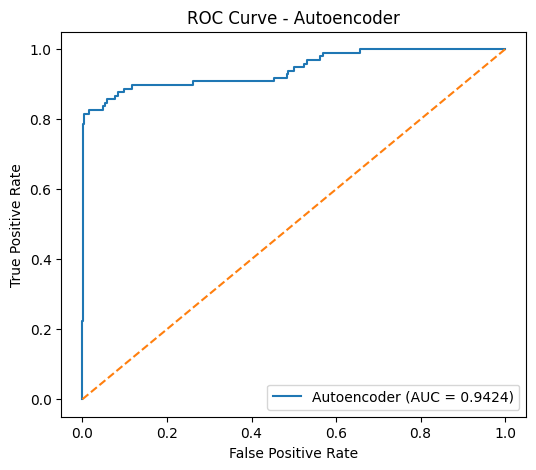

Autoencoder AUC Score: 0.9423508148335303


In [74]:
#ROC Curve – Autoencoder

fpr, tpr, _ = roc_curve(y_test_all, mse)
roc_auc_ae = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Autoencoder (AUC = %0.4f)" % roc_auc_ae)
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Autoencoder")
plt.legend(loc="lower right")
plt.show()

print("Autoencoder AUC Score:", roc_auc_ae)


In [75]:
# ===============================
# User Input Fraud Prediction System
# ===============================

def predict_fraud(user_input):
    # Convert input to DataFrame with correct feature names
    user_df = pd.DataFrame([user_input], columns=X.columns)
    
    # Scale using trained scaler
    user_scaled = scaler.transform(user_df)
    
    # Predict using trained Random Forest model
    prediction = rf.predict(user_scaled)[0]
    probability = rf.predict_proba(user_scaled)[0][1]
    
    if prediction == 1:
        print("⚠️ Prediction: FRAUD")
    else:
        print("✅ Prediction: NORMAL")
    
    print("Fraud Probability:", round(probability * 100, 2), "%")


In [76]:
# Show some fraud row numbers
print("Some FRAUD row numbers are:")
print(df[df['Class'] == 1].index[:10].tolist())


Some FRAUD row numbers are:
[541, 623, 4920, 6108, 6329, 6331, 6334, 6336, 6338, 6427]


In [78]:
# ===============================
# Faculty Check (by Row Number)
# ===============================

row = int(input("Enter a row number from dataset (0 to 284806): "))

# Get input features and actual label
sample_input = list(df.drop('Class', axis=1).iloc[row])
actual = df['Class'].iloc[row]

# Show actual class
if actual == 1:
    print("\nActual Class: FRAUD")
else:
    print("\nActual Class: NORMAL")

# Predict using trained model
predict_fraud(sample_input)



Actual Class: NORMAL
✅ Prediction: NORMAL
Fraud Probability: 0.26 %
